In [6]:
from pylab import *

## Perplexity

In [7]:

id = "llama2-7b-physics-books"

PhysX_chkpnts_ppls = {
    "800": 3.8837,
    "1000": 3.4865,
    "1200": 3.3144,
    "1400": 3.1000,
    "1600": 2.9205,
    "1800": 2.8501,
    "2000": 2.6612,
    "2200": 2.6478,
    "2400": 2.5972,
    "2500": 2.4792,
}
Physx_x_ax = list(range(len(PhysX_chkpnts_ppls.keys())))
Physx_x_ax = np.array(Physx_x_ax) + 12


In [8]:
id = "llama2-7b-coaxnn-paper"

coaxnn_chkpnts_ppls = {
    "15":  5.5560,
    "30":  4.8751,
    "45":  4.3396,
    "60":  3.8301,
    "75":  3.4615,
    "90":  3.1854,
    "105":  2.9590,
    "120":  2.7482,
    "135":  2.6448,
    "150":  2.5469,
    "165":  2.4975,
    "180":  2.4932
}

# coaxnn_x_ax = [int(chk) for chk in coaxnn_chkpnts_ppls]
coaxnn_x_ax = list(range(len(coaxnn_chkpnts_ppls.keys())))


In [9]:
paper_text_ppl_degrade = {
    "15":    6.2970,
    "30":    6.3304,
    "45":    6.6806,
    "60":    6.9691,
    "75":    7.4702,
    "90":    7.9909,
    "105":    8.2656,
    "120":    8.6381,
    "135":    9.4876,
    "150":    9.7812,
    "165":    10.1182,
    "180":    10.3292
}

coaxnn_Degrade_x_ax = list(range(len(paper_text_ppl_degrade.keys())))


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


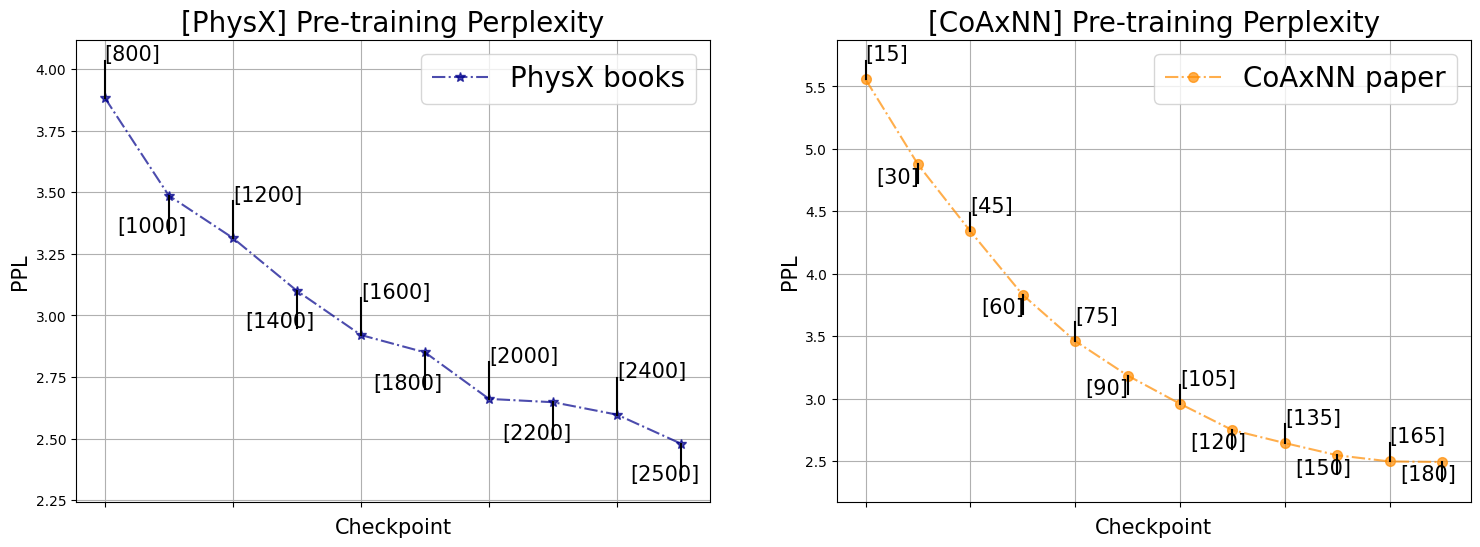

In [60]:


figure(figsize=(18,6))

subplot(1,2,1)

title("[PhysX] Pre-training Perplexity", fontsize=20)

plot( Physx_x_ax, PhysX_chkpnts_ppls.values(), '-.*', color='darkblue', ms=7, alpha=.7)

flip = True
for ix, value, chkpnt_str in zip(Physx_x_ax, PhysX_chkpnts_ppls.values(), PhysX_chkpnts_ppls.keys()):
    if flip:
        offy = 0.15
        offx = 0
        flip = False
    else:
        offy = - 0.15
        offx = -0.8
        flip = True
        
    plt.text(ix + offx, value + offy, f"[{chkpnt_str}]", fontsize=15)
    plot([ix, ix], [value, value + offy], '-k')


# gca().invert_yaxis()

ylabel("PPL", size=15)
xlabel("Checkpoint", size=15)

# custom_x_labels = list(coaxnn_chkpnts_ppls.keys())
gca().set_xticklabels("")


legend(["PhysX books"], fontsize=20)

grid()
 







subplot(1,2,2)

title("[CoAxNN] Pre-training Perplexity", fontsize=20)

plot( coaxnn_x_ax, coaxnn_chkpnts_ppls.values(), '-.o', color='darkorange', ms=7, alpha=.7)

flip = True

for ix, value, chkpnt_str in zip(coaxnn_x_ax, coaxnn_chkpnts_ppls.values(), coaxnn_chkpnts_ppls.keys()):
    if flip:
        offy = 0.15
        offx = 0
        flip = False
    else:
        offy = - 0.15
        offx = -0.8
        flip = True
    plt.text(ix + offx, value + offy, f"[{chkpnt_str}]", fontsize=15)
    plot([ix, ix], [value, value + offy], '-k')


# gca().invert_yaxis()

ylabel("PPL", size=15)
xlabel("Checkpoint", size=15)

# custom_x_labels = list(coaxnn_chkpnts_ppls.keys())
gca().set_xticklabels("")


legend(["CoAxNN paper"], fontsize=20)

grid()



savefig("./figs/Combined_ppl_fig.png", bbox_inches = 'tight')

# vectorized image
savefig("./figs/Combined_ppl_fig.eps", bbox_inches = 'tight', format='eps')

show()




The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


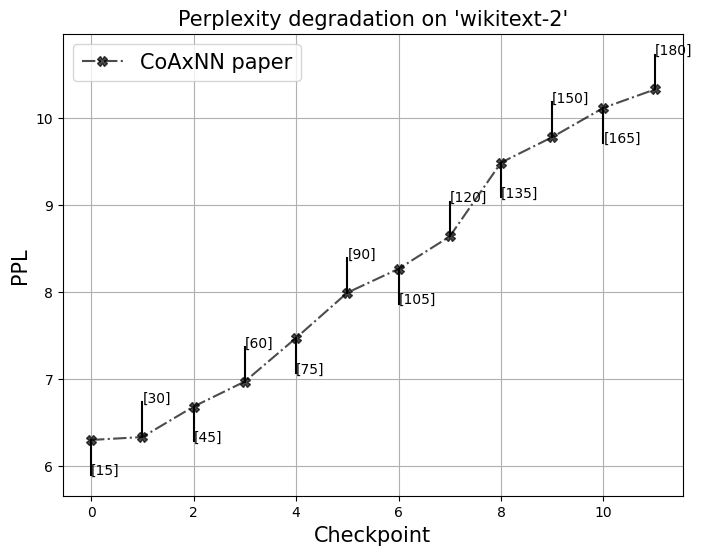

In [61]:


figure(figsize=(8,6))

# subplot(1,3,3)
title("Perplexity degradation on 'wikitext-2'", fontsize=15)
plot( coaxnn_Degrade_x_ax, paper_text_ppl_degrade.values(), '-.X', color='black', ms=7, alpha=.7)

flip = True

for ix, value, chkpnt_str in zip(coaxnn_Degrade_x_ax, paper_text_ppl_degrade.values(), paper_text_ppl_degrade.keys()):
    if flip:
        offy = -0.4
        offx = 0
        flip = False
    else:
        offy = 0.4
        offx = 0
        flip = True
    plt.text(ix + offx, value + offy, f"[{chkpnt_str}]", fontsize=10)
    plot([ix, ix], [value, value + offy], '-k')


legend(["CoAxNN paper"], fontsize=15)
ylabel("PPL", size=15)
xlabel("Checkpoint", size=15)
grid()

savefig("./figs/paper_ppl_degrade_fig.png", bbox_inches = 'tight')

# vectorized image
savefig("./figs/paper_ppl_degrade_fig.eps", bbox_inches = 'tight', format='eps')

show()


## Rouge 1/2/L

In [8]:
id_PhysX = "llama2-7b-physics-finetuned-qna"

rouge_PhysX = {
    "800": {'rouge1': 0.38922171554249835, 'rouge2': 0.2305972394672058, 'rougeL': 0.3532669632326349, 'rougeLsum': 0.35399503863786186},
    "2400": {'rouge1': 0.40675291382143863, 'rouge2': 0.25851484379806244, 'rougeL': 0.37530751611910307, 'rougeLsum': 0.3755249930898228},
    "2600": {'rouge1': 0.40568813236352796, 'rouge2': 0.2615494931602097, 'rougeL': 0.3749710701870771, 'rougeLsum': 0.3746940679362417}
}

# x_ax_PhysX = [int(chk) for chk in rouge_PhysX.keys()]
x_ax_PhysX = list(range(len(rouge_PhysX.keys())))
x_ax_PhysX = np.array(x_ax_PhysX) + 8

ragg_PhysX = {
    'rouge1' : [],
    'rouge2': [],
    'rougeL': [],
    'rougeLsum': []
}

for chkpnt, rouge_all in rouge_PhysX.items():
    for rouge_metric, value in rouge_all.items():
        ragg_PhysX[rouge_metric].append(value)


In [9]:
id = "llama2-7b-coaxnn-paper-qna"

rouge_coaxnn = {
    "30": {'rouge1': 0.4762379339042687, 'rouge2': 0.33662465544663644, 'rougeL': 0.445242229580913, 'rougeLsum': 0.44592832400347826},
    "60": {'rouge1': 0.5112914243916988, 'rouge2': 0.3841410669968519, 'rougeL': 0.48539863677976, 'rougeLsum': 0.48543443341614567},
    "90": {'rouge1': 0.528365036335644, 'rouge2': 0.4051975372623793, 'rougeL': 0.5035957941418218, 'rougeLsum': 0.5038833168694969},
    "120": {'rouge1': 0.541718677592004, 'rouge2': 0.40933735442657915, 'rougeL': 0.5078593586391036, 'rougeLsum': 0.508674516504764},
    "150": {'rouge1': 0.5819391418567528, 'rouge2': 0.4638644921161161, 'rougeL': 0.5577556405162143, 'rougeLsum': 0.5578971351801791},
    "180": {'rouge1': 0.5795417385660675, 'rouge2': 0.46587873922987055, 'rougeL': 0.5549968598745261, 'rougeLsum': 0.5543849541839843},
    "210": {'rouge1': 0.5939285175749377, 'rouge2': 0.4875594573497298, 'rougeL': 0.5724926012416762, 'rougeLsum': 0.5727452660262593},
    "240": {'rouge1': 0.633458889031395, 'rouge2': 0.5316161924761215, 'rougeL': 0.613515922368001, 'rougeLsum': 0.6141109152033188},
    "270": {'rouge1': 0.6556622360640748, 'rouge2': 0.5661835101559034, 'rougeL': 0.6368397358142701, 'rougeLsum': 0.637196275630574},
    "300": {'rouge1': 0.6686579022511565, 'rouge2': 0.5767991450103657, 'rougeL': 0.6496125644093036, 'rougeLsum': 0.6500833998929884},
    "330": {'rouge1': 0.700791002891539, 'rouge2': 0.6177797058064096, 'rougeL': 0.6841409971670108, 'rougeLsum': 0.6857339202012849},
    "360": {'rouge1': 0.7077523877720617, 'rouge2': 0.6256397530558999, 'rougeL': 0.692037749367902, 'rougeLsum': 0.6938395826800096}

}


# x_ax_coaxnn = [int(chk) * 10 for chk in rouge_coaxnn.keys()]
x_ax_coaxnn = list(range(len(rouge_coaxnn.keys())))

ragg_coaxnn = {
    'rouge1' : [],
    'rouge2': [],
    'rougeL': [],
    'rougeLsum': []
}

for chkpnt, rouge_all in rouge_coaxnn.items():
    for rouge_metric, value in rouge_all.items():
        ragg_coaxnn[rouge_metric].append(value)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


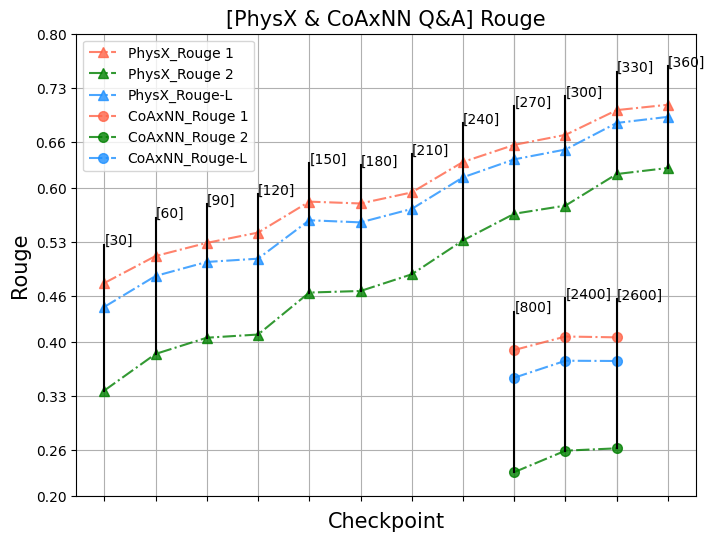

In [12]:
figure(figsize=(8, 6))

title("[PhysX & CoAxNN Q&A] Rouge", fontsize=15)

    
plot_func = plot

plot_func( x_ax_coaxnn, ragg_coaxnn['rouge1'], '-.^', color='tomato', ms=7, alpha=.8)
plot_func( x_ax_coaxnn, ragg_coaxnn['rouge2'], '-.^g', ms=7, alpha=.8)
plot_func( x_ax_coaxnn, ragg_coaxnn['rougeL'], '-.^', color='dodgerblue', ms=7, alpha=.8)

plot_func( x_ax_PhysX, ragg_PhysX['rouge1'], '-.o', color='tomato', ms=7, alpha=.8)
plot_func( x_ax_PhysX, ragg_PhysX['rouge2'], '-.og', ms=7, alpha=.8)
plot_func( x_ax_PhysX, ragg_PhysX['rougeL'], '-.o', color='dodgerblue',ms=7, alpha=.8)
# plot( x_ax, ragg['rougeLsum'], '-.Xc', ms=7, alpha=.8)


for ix, chkpnt_label in zip(x_ax_coaxnn, rouge_coaxnn.keys()):
    plt.text(ix, ragg_coaxnn['rouge1'][ix] + 0.05, f"[{chkpnt_label}]")

for ix, chkpnt_label in zip( range(len(x_ax_PhysX)), rouge_PhysX.keys()):
    plt.text(ix + 8, ragg_PhysX['rouge1'][ix]  + 0.05, f"[{chkpnt_label}]")

for ix, y_r1, y_r2 in zip(x_ax_coaxnn, ragg_coaxnn['rouge1'], ragg_coaxnn['rouge2']):
    plot([ix, ix], [y_r1 + 0.05, y_r2], 'k')

for ix, y_r1, y_r2 in zip(range(len(x_ax_PhysX)), ragg_PhysX['rouge1'], ragg_PhysX['rouge2']):
    plot([ix + 8, ix + 8], [y_r1 + 0.05, y_r2], 'k')



xticks(list(x_ax_coaxnn) + list(x_ax_PhysX))

yticks( (np.linspace(0.2, 0.8,10) * 100).astype(int) / 100 )

gca().set_xticklabels("")

xlabel('Checkpoint', fontsize=15)
ylabel('Rouge', fontsize=15)

grid()




legend(["PhysX_Rouge 1", "PhysX_Rouge 2", "PhysX_Rouge-L", "CoAxNN_Rouge 1", "CoAxNN_Rouge 2", "CoAxNN_Rouge-L"], fontsize=10)

savefig("./figs/Combined_rouge_fig.png", bbox_inches = 'tight')

# vectorized image
savefig("./figs/Combined_rouge_fig.eps", bbox_inches = 'tight', format='eps')

show()


### PPL degradation on wikitext-2

In [1]:
paper_text_ppl_degrade = [6.2970,
    6.3304,
    6.6806,
    6.9691,
    7.4702,
    7.9909,
    8.2656,
    8.6381,
    9.4876,
    9.7812,
    10.1182,
    10.3292
]